## Importing Libraries

In [138]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly

import warnings
warnings.filterwarnings("ignore")

## Reading the Data

In [92]:
data = pd.read_excel("C:\\Users\\Osama Kamal\\Downloads\\corona-virus-pakistan-dataset-2020\\COVID_FINAL_DATA.xlsx")

In [93]:
data.head()

,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,48,2,80,2020-03-11,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11,0,0,NaN,0,KPTD,0,0


## Exploratory Analysis

In [94]:
# Checking NAN values
data.isnull().sum()

Unnamed: 0                             0
Cumulative                             0
Cumulative  Test positive              0
Cumulative  tests performed            0
Date                                   0
Discharged                             0
Expired                                0
Home Quarantine                      139
New  (last 24 hrs)                     0
Region                                 0
Still admitted                         0
Tests  performed in last 24 hours      0
dtype: int64

In [95]:
df = data.fillna(0)
df.isnull().sum()

Unnamed: 0                           0
Cumulative                           0
Cumulative  Test positive            0
Cumulative  tests performed          0
Date                                 0
Discharged                           0
Expired                              0
Home Quarantine                      0
New  (last 24 hrs)                   0
Region                               0
Still admitted                       0
Tests  performed in last 24 hours    0
dtype: int64

In [96]:
df_pak = df[['Date', 'Region', 'Cumulative  Test positive', 'Expired', 'Discharged', 'New  (last 24 hrs)']]

df_pak.head()

,Date,Region,Cumulative Test positive,Expired,Discharged,New (last 24 hrs)
0,2020-03-11,ICT,2,0,0,3
1,2020-03-11,Punjab,0,0,0,6
2,2020-03-11,Sindh,14,0,1,1
3,2020-03-11,KP,0,0,0,0
4,2020-03-11,KPTD,0,0,0,0


In [97]:
# Highlight the cases

df_pak.style.background_gradient(cmap='Reds')

In [98]:
# Total active cases

# Total Active = Test Positive - (Expired + Discharged)

df_pak['Total Active'] = df_pak['Cumulative  Test positive'] - (df_pak['Expired'] - df_pak['Discharged'])
total_active = df_pak['Total Active'].sum()

total_cases = df_pak.groupby('Region')['Total Active'].sum().sort_values(ascending=False).to_frame()
total_cases.style.background_gradient(cmap='Reds')

,Total Active
Region,
Punjab,113561
Sindh,85392
KP,35987
Balochistan,16323
GB,11611
ICT,5617
AJK,1373
Mobile Lab,6
KPTD,0


## Visual Analytics

### Cumulative Positive Cases VS Discharged 

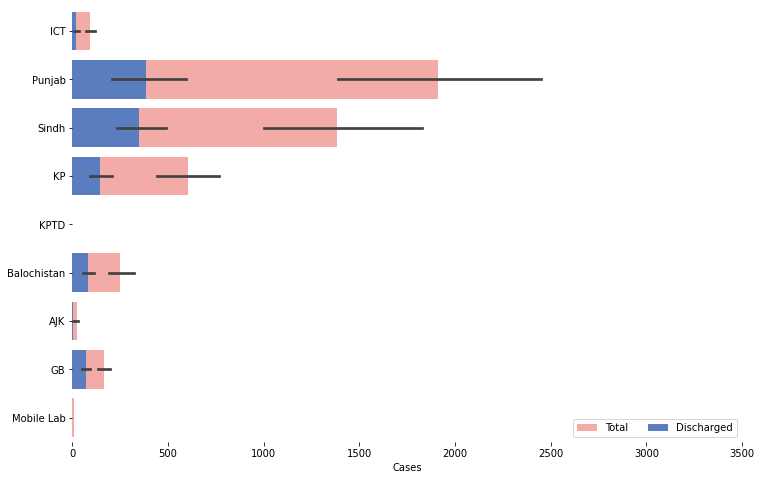

In [99]:
f, ax = plt.subplots(figsize=(12,8))

viz_data = df[['Region', 'Cumulative  Test positive', 'Discharged', 'Expired']]
viz_data.sort_values('Cumulative  Test positive', ascending=True)
viz_data
sns.set_color_codes('pastel')
sns.barplot(x='Cumulative  Test positive', y='Region', data=viz_data, label="Total", color='r')

sns.set_color_codes('muted')
sns.barplot(x='Discharged', y='Region', data=viz_data, label='Discharged', color='b')

# Legend

ax.legend(ncol=2, loc='lower right', frameon=True)
ax.set(xlim=(0,3500), ylabel='', xlabel="Cases")
sns.despine(left=True, bottom=True)


### Cumulative Positive Region-wise Breakup

In [166]:
n = data.groupby(['Date' ,'Region'])['Cumulative  Test positive'].sum().reset_index()
px.bar(n, x='Date', y='Cumulative  Test positive', color='Region')

In [146]:
n = data.groupby(['Date' ,'Region'])['Cumulative  Test positive'].sum().reset_index()
px.line(n, x='Date', y='Cumulative  Test positive', color='Region')

### Number of Patients Discharged

In [152]:
m = data.groupby(['Date' ,'Region'])['Discharged'].sum().reset_index()
px.line(m, x='Date', y='Discharged', color='Region')

### Number of Patients Expired

In [153]:
l = data.groupby(['Date' ,'Region'])['Expired'].sum().reset_index()
px.line(l, x='Date', y='Expired', color='Region')

### New Cases Within Last 24 Hours

In [160]:
k = data.groupby(['Date' ,'Region'])['New  (last 24 hrs)'].apply(sum).reset_index()
px.line(k, x='Date', y='New  (last 24 hrs)', color='Region')

## Forecasting Using Facebook Prophet Model

In [109]:
from fbprophet import Prophet

In [110]:
confirmed_cases = Final_data_pak.groupby('Date').agg({'Cumulative  Test positive':['sum']}).reset_index()
confirmed_cases

,Date,Cumulative Test positive
,,sum
0,2020-03-11,19
1,2020-03-12,20
2,2020-03-13,21
3,2020-03-14,28
4,2020-03-15,31
5,2020-03-16,53
6,2020-03-17,187
7,2020-03-18,241
8,2020-03-19,302


In [122]:
confirmed_cases.columns = ['ds', 'y']
confirmed_cases['ds'] = pd.to_datetime(confirmed_cases['ds'])

In [123]:
confirmed_cases.tail()

,ds,y
45,2020-04-25,12723
46,2020-04-26,12723
47,2020-04-27,13328
48,2020-04-28,14079
49,2020-04-29,14885


In [177]:
m = Prophet(interval_width=0.95)
m.fit(confirmed_cases)
future = m.make_future_dataframe(periods=10)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
55,2020-05-05
56,2020-05-06
57,2020-05-07
58,2020-05-08
59,2020-05-09


In [178]:
# Predicting the future with date, upper and lower limit of y value

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
55,2020-05-05,18924.062726,18421.550427,19398.979009
56,2020-05-06,19697.930669,19108.168274,20251.411242
57,2020-05-07,20392.139467,19673.650816,21086.923349
58,2020-05-08,21084.375927,20315.442135,21867.946084
59,2020-05-09,21710.050043,20757.187212,22674.325979


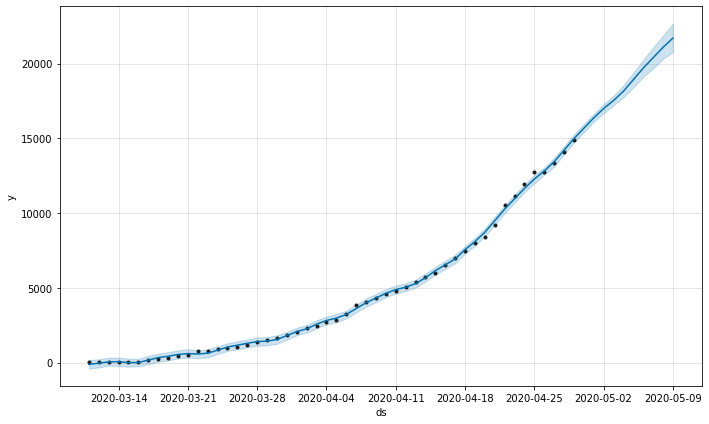

In [180]:
confirmed_forecast_plot = m.plot(forecast)

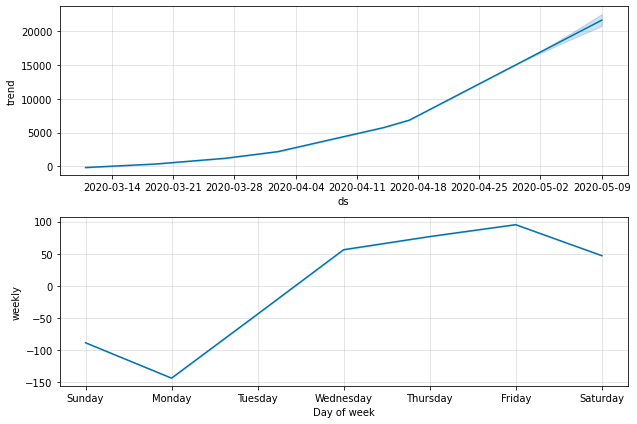

In [181]:
confimed_forecast_plot = m.plot_components(forecast)

----